In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc, roc_curve

import csv

import sklearn
from sklearn.model_selection import train_test_split
import os
import numpy as np
import os
import shutil
import random
from matplotlib import pyplot as plt
import matplotlib

print("\nLibraries\n-----------------------------")
print(f"Tensorflow: {tf.__version__}")
print(f"Scikit Learn: {sklearn.__version__}")
print(f"Numpy: {np.__version__}")
print(f"Matplotlib: {matplotlib.__version__}")


Libraries
-----------------------------
Tensorflow: 2.12.0
Scikit Learn: 1.3.1
Numpy: 1.22.0
Matplotlib: 3.7.0


In [2]:
def count_files_in_directory(directory_path):
    total_files = 0

    for root, _, files in os.walk(directory_path):
        total_files += len(files)

    return total_files

In [3]:
def create_test_set(source_dir, test_dir, class_names, test_percent):
    os.makedirs(test_dir, exist_ok = True)
    
    for class_name in class_names:
        class_source_dir = os.path.join(source_dir, class_name)
        class_test_dir = os.path.join(test_dir, class_name)
        os.makedirs(class_test_dir, exist_ok = True)
        
        images = os.listdir(class_source_dir)
        num_images = len(images)
        num_test_images = int(test_percent * num_images)
        
        test_indices = random.sample(range(num_images), num_test_images)
        
        for index in test_indices:
            image_name = images[index]
            source_path = os.path.join(class_source_dir, image_name)
            target_path = os.path.join(class_test_dir, image_name)
            shutil.move(source_path, target_path)

In [4]:
# Define image dimensions and other parameters
img_height, img_width = 250, 200
num_classes = 3

data_dir = "./DS3/Train"
class_names = os.listdir(data_dir)

# test set
source_data_dir = "./DS3/Train"
test_data_dir = "./DS3/Test"
valid_data_dir = "./DS3/Validset"
class_names = os.listdir(source_data_dir)

first_execution = True

if first_execution:
    create_test_set(source_data_dir, test_data_dir, class_names, 0.3)
    create_test_set(source_data_dir, valid_data_dir, class_names, 0.2)

In [5]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    rescale = 1.0 / 255.0
)

data_generator = datagen.flow_from_directory(
    source_data_dir,
    target_size = (img_height, img_width),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    classes = class_names
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
        valid_data_dir,
        target_size = (img_height, img_width),
        batch_size = 14,
        class_mode = 'categorical',
        shuffle = True,
        classes = class_names
)

Found 662 images belonging to 3 classes.
Found 165 images belonging to 3 classes.


In [7]:
base_model = DenseNet201(include_top = False, input_shape = (img_height, img_width, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation = 'relu', kernel_initializer = 'uniform')(x)
predictions = Dense(num_classes, activation = 'softmax')(x)

model = Model(inputs = base_model.input, outputs = predictions)

model.compile(optimizer = SGD(learning_rate = 0.001, momentum = 0.9),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

history = model.fit(data_generator, epochs = 100,
                    validation_data = validation_generator)

Epoch 1/100
21/21 [==============================] - 53s 2s/step - loss: 0.8374 - accuracy: 0.6480 - val_loss: 0.7043 - val_accuracy: 0.7939
Epoch 2/100
21/21 [==============================] - 45s 2s/step - loss: 0.5570 - accuracy: 0.7931 - val_loss: 0.5941 - val_accuracy: 0.7758
Epoch 3/100
21/21 [==============================] - 45s 2s/step - loss: 0.4516 - accuracy: 0.8233 - val_loss: 0.5922 - val_accuracy: 0.7818
Epoch 4/100
21/21 [==============================] - 46s 2s/step - loss: 0.3968 - accuracy: 0.8489 - val_loss: 0.4834 - val_accuracy: 0.8485
Epoch 5/100
21/21 [==============================] - 45s 2s/step - loss: 0.3544 - accuracy: 0.8686 - val_loss: 0.4544 - val_accuracy: 0.8424
Epoch 6/100
21/21 [==============================] - 44s 2s/step - loss: 0.3511 - accuracy: 0.8580 - val_loss: 0.4489 - val_accuracy: 0.8606
Epoch 7/100
21/21 [==============================] - 44s 2s/step - loss: 0.3374 - accuracy: 0.8701 - val_loss: 0.4455 - val_accuracy: 0.8364
Epoch 8/100
2

Epoch 59/100
21/21 [==============================] - 46s 2s/step - loss: 0.1764 - accuracy: 0.9260 - val_loss: 0.2768 - val_accuracy: 0.8848
Epoch 60/100
21/21 [==============================] - 45s 2s/step - loss: 0.1634 - accuracy: 0.9366 - val_loss: 0.2587 - val_accuracy: 0.8909
Epoch 61/100
21/21 [==============================] - 44s 2s/step - loss: 0.1390 - accuracy: 0.9456 - val_loss: 0.2879 - val_accuracy: 0.8788
Epoch 62/100
21/21 [==============================] - 45s 2s/step - loss: 0.1475 - accuracy: 0.9547 - val_loss: 0.2888 - val_accuracy: 0.8788
Epoch 63/100
21/21 [==============================] - 45s 2s/step - loss: 0.1699 - accuracy: 0.9350 - val_loss: 0.2798 - val_accuracy: 0.8848
Epoch 64/100
21/21 [==============================] - 45s 2s/step - loss: 0.1672 - accuracy: 0.9441 - val_loss: 0.2732 - val_accuracy: 0.8970
Epoch 65/100
21/21 [==============================] - 45s 2s/step - loss: 0.1409 - accuracy: 0.9532 - val_loss: 0.2426 - val_accuracy: 0.8970
Epoch 

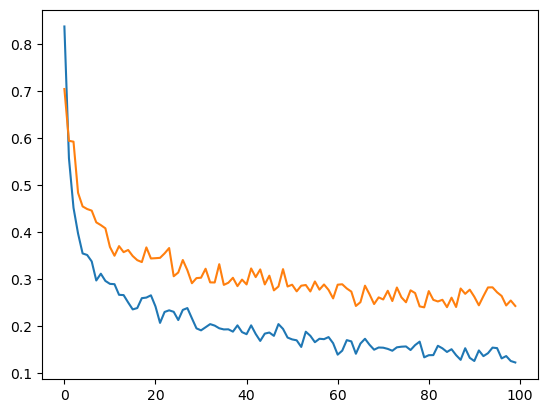

In [8]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

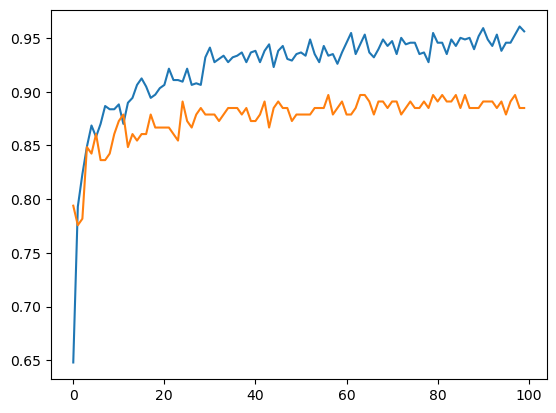

In [9]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.show()

In [10]:
final_datagen = ImageDataGenerator(
    rescale=1./255
)
final_generator = final_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_height, img_width),
    class_mode = 'categorical',
    batch_size = count_files_in_directory(test_data_dir),
    shuffle = False,
    classes = class_names
)

Found 352 images belonging to 3 classes.


In [11]:
real_labels = []
original_probs = []
original_labels = []
adversarial_probs = []
adversarial_labels = []

batch_images, batch_labels = next(final_generator)

for individual_image in range(batch_images.shape[0]):
    single_image_array = batch_images[individual_image]
    single_image_label = batch_labels[individual_image]
    
    original_prob = model.predict(np.expand_dims(single_image_array, axis=0))
    original_pred = np.argmax(original_prob)
    
    target_image = tf.convert_to_tensor(np.expand_dims(single_image_array, axis=0))
    with tf.GradientTape() as tape:
        tape.watch(target_image)
        prediction = model(target_image)
        loss = tf.keras.losses.binary_crossentropy(single_image_label, prediction[0])
    gradient = tape.gradient(loss, target_image)
    perturbed_image = target_image + 0.007 * tf.sign(gradient)
    
    adversarial_prob = model.predict(np.expand_dims(perturbed_image[0], axis=0))
    adversarial_pred = np.argmax(adversarial_prob)
    
    real_labels.append(single_image_label)
    original_probs.append(original_prob[0, original_pred])
    adversarial_probs.append(adversarial_prob[0, adversarial_pred])
    original_labels.append(original_pred)
    adversarial_labels.append(adversarial_pred)

original_probs = np.array(original_probs).reshape(-1)
adversarial_probs = np.array(adversarial_probs).reshape(-1)
adversarial_labels = np.array(adversarial_labels).reshape(-1)
original_labels = np.array(original_labels).reshape(-1)

1/1 [==============================] - 0s 190ms/step


1/1 [==============================] - 0s 207ms/step


1/1 [==============================] - 0s 215ms/step


In [12]:
class_labels = []
for array in real_labels:
    class_label = np.argmax(array)
    class_labels.append(class_label)
real_labels = class_labels

In [13]:
indices0 = [index for index, value in enumerate(real_labels) if value == 0]
indices1 = [index for index, value in enumerate(real_labels) if value == 1]
indices2 = [index for index, value in enumerate(real_labels) if value == 2]

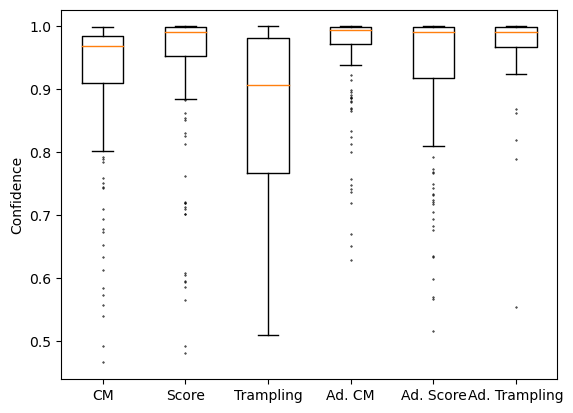

In [14]:
original_cm_probs = original_probs[indices0]
original_score_probs = original_probs[indices1]
original_trampling_probs = original_probs[indices2]

adversarial_cm_probs = adversarial_probs[indices0]
adversarial_score_probs = adversarial_probs[indices1]
adversarial_trampling_probs = adversarial_probs[indices2]

data = [original_cm_probs, original_score_probs, original_trampling_probs,
       adversarial_cm_probs, adversarial_score_probs, adversarial_trampling_probs]
labels = ["CM", "Score", "Trampling", "Ad. CM", "Ad. Score", "Ad. Trampling"]
plt.boxplot(data, flierprops = dict(
    marker = ".", markersize = 1
))
plt.ylabel("Confidence")
plt.xticks([1, 2, 3, 4, 5, 6], labels)
plt.show()

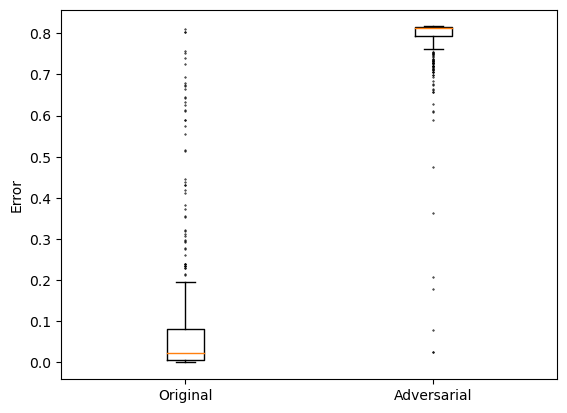

In [15]:
original_errors = []
adversarial_errors = []

for individual_image in range(batch_images.shape[0]):
    single_image_array = batch_images[individual_image]
    single_image_label = batch_labels[individual_image]
    
    original_prob = model.predict(np.expand_dims(single_image_array, axis=0), verbose = 0)
    original_error = np.sqrt(np.mean((original_prob - single_image_label) ** 2))
    
    target_image = tf.convert_to_tensor(np.expand_dims(single_image_array, axis=0))
    with tf.GradientTape() as tape:
        tape.watch(target_image)
        prediction = model(target_image)
        loss = tf.keras.losses.binary_crossentropy(single_image_label, prediction[0])
    gradient = tape.gradient(loss, target_image)
    perturbed_image = target_image + 0.007 * tf.sign(gradient)
    
    adversarial_prob = model.predict(np.expand_dims(perturbed_image[0], axis=0), verbose = 0)
    adversarial_error = np.sqrt(np.mean((adversarial_prob - single_image_label) ** 2))
    
    original_errors.append(original_error)
    adversarial_errors.append(adversarial_error)

original_errors = np.array(original_errors).reshape(-1)
adversarial_errors = np.array(adversarial_errors).reshape(-1)

data = [original_errors, adversarial_errors]
labels = ["Original", "Adversarial"]

plt.boxplot(data, flierprops = dict(
    marker = ".", markersize = 1
))
plt.xticks([1, 2], labels)
plt.ylabel("Error")
plt.show()

In [16]:

print(f"Original Tooth Score Loss {np.mean(original_errors[indices1]) * 100:.2f}%")
print(f"Original Cut Mark Loss {np.mean(original_errors[indices0]) * 100:.2f}%")
print(f"Original Trampling Mark Loss {np.mean(original_errors[indices2]) * 100:.2f}%")
print(f"Adversarial Tooth Score Loss {np.mean(adversarial_errors[indices1]) * 100:.2f}%")
print(f"Adversarial Cut Mark Loss {np.mean(adversarial_errors[indices0]) * 100:.2f}%")
print(f"Adversarial Trampling Mark Loss {np.mean(adversarial_errors[indices2]) * 100:.2f}%")

print("\n----------------------------------\n")

print(f"Original Loss {np.mean(original_errors) * 100:.2f}%")
print(f"Adversarial Loss {np.mean(adversarial_errors) * 100:.2f}%")

Original Tooth Score Loss 7.95%
Original Cut Mark Loss 7.90%
Original Trampling Mark Loss 22.35%
Adversarial Tooth Score Loss 77.32%
Adversarial Cut Mark Loss 79.62%
Adversarial Trampling Mark Loss 75.67%

----------------------------------

Original Loss 9.77%
Adversarial Loss 78.23%


In [17]:
print(classification_report(real_labels, adversarial_labels))
print(confusion_matrix(real_labels, adversarial_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.05      0.02      0.03       136
           2       0.01      0.07      0.02        45

    accuracy                           0.02       352
   macro avg       0.02      0.03      0.02       352
weighted avg       0.02      0.02      0.01       352

[[  0  31 140]
 [ 29   3 104]
 [ 13  29   3]]


In [18]:
print(classification_report(real_labels, original_labels))
print(confusion_matrix(real_labels, original_labels))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       171
           1       0.91      0.93      0.92       136
           2       0.79      0.73      0.76        45

    accuracy                           0.91       352
   macro avg       0.88      0.87      0.88       352
weighted avg       0.91      0.91      0.91       352

[[163   2   6]
 [  7 126   3]
 [  1  11  33]]


In [19]:
print(classification_report(original_labels, adversarial_labels))
print(confusion_matrix(original_labels, adversarial_labels))

              precision    recall  f1-score   support

           0       0.17      0.04      0.07       171
           1       0.25      0.12      0.16       139
           2       0.05      0.29      0.08        42

    accuracy                           0.10       352
   macro avg       0.16      0.15      0.10       352
weighted avg       0.19      0.10      0.10       352

[[  7  29 135]
 [ 23  16 100]
 [ 12  18  12]]
